<a href="https://colab.research.google.com/github/ammad3059/pandas/blob/master/mnist_using_CNN_and_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Working on mnist dataset

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
print(tf.__version__)

2.3.0


In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models,layers

In [6]:
(train_img,train_lbl),(test_img,test_lbl)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
train_img.shape

(60000, 28, 28)

In [8]:
test_img.shape

(10000, 28, 28)

In [50]:
train_img.shape[0]

60000

In [9]:
from tensorflow.keras.utils import normalize

In [10]:
train_img=normalize(train_img,axis=1)
test_img=normalize(test_img,axis=1)

In [12]:
model=models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [13]:
model.fit(train_img,train_lbl,batch_size=30,epochs=10)

Epoch 1/10
2000/2000 [==============================] - 10s 5ms/step - loss: 0.2168 - acc: 0.9354
Epoch 2/10
2000/2000 [==============================] - 11s 5ms/step - loss: 0.0862 - acc: 0.9729
Epoch 3/10
2000/2000 [==============================] - 12s 6ms/step - loss: 0.0538 - acc: 0.9831
Epoch 4/10
2000/2000 [==============================] - 11s 5ms/step - loss: 0.0388 - acc: 0.9873
Epoch 5/10
2000/2000 [==============================] - 11s 5ms/step - loss: 0.0287 - acc: 0.9903
Epoch 6/10
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0210 - acc: 0.9928
Epoch 7/10
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0187 - acc: 0.9941
Epoch 8/10
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0165 - acc: 0.9946
Epoch 9/10
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0136 - acc: 0.9953
Epoch 10/10
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0122 - acc: 0.9960


In [14]:
loss,acc=model.evaluate(test_img,test_lbl)
print(loss,acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1029 - acc: 0.9776
0.10292942821979523 0.9775999784469604


In [15]:
predictions=model.predict([test_img])

Consider rewriting this model with the Functional API.


In [17]:
print(np.argmax(predictions[123]))

6


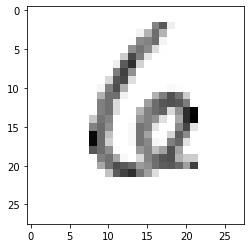

In [19]:
plt.imshow(test_img[123],cmap=plt.cm.binary)
plt.show()

Working on mnist dataset using convolutional layers and maxpooling

In [45]:
img_rows=train_img[0].shape[0]
img_cols=train_img[0].shape[1]

train_img=train_img.reshape(train_img.shape[0],img_rows,img_cols,1)

test_img=test_img.reshape(test_img.shape[0],img_rows,img_cols,1)

In [46]:
cmodel=models.Sequential()

cmodel.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
cmodel.add(layers.MaxPooling2D(pool_size=(2,2)))
cmodel.add(layers.Conv2D(64,(3,3),activation='relu'))
cmodel.add(layers.MaxPooling2D(pool_size=(2,2)))
cmodel.add(layers.Flatten())
cmodel.add(layers.Dense(128,activation='relu'))
cmodel.add(layers.Dense(10,activation='softmax'))

cmodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

cmodel.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_31 (Dense)             (None, 10)              

In [48]:
cmodel.fit(train_img,train_lbl,epochs=3,batch_size=60)

Epoch 1/3
1000/1000 [==============================] - 84s 84ms/step - loss: 0.0673 - acc: 0.9796
Epoch 2/3
1000/1000 [==============================] - 86s 86ms/step - loss: 0.0429 - acc: 0.9867
Epoch 3/3
1000/1000 [==============================] - 83s 83ms/step - loss: 0.0321 - acc: 0.9902
